<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9043-CDNA-20203/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

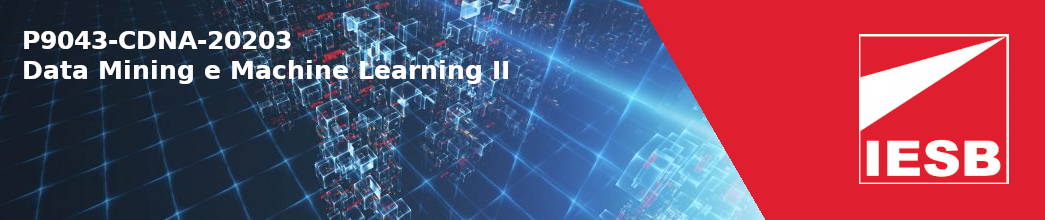

In [ ]:
from IPython.display import Image
Image('/content/sample_data/banner_iesb_pos_colab_dmmlii.png')

## KMeans

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Importando a base
df = pd.read_csv('/content/sample_data/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Verificando o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


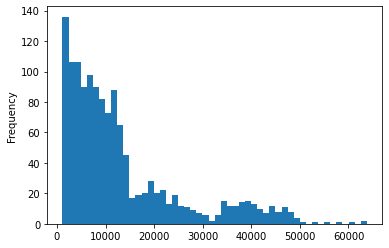

In [6]:
# Analisando os dados
df['charges'].plot.hist(bins=50)

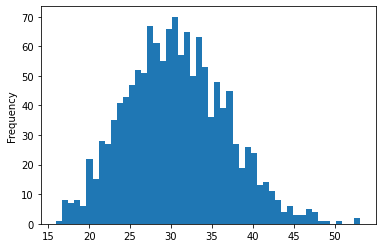

In [7]:
df['bmi'].plot.hist(bins=50)

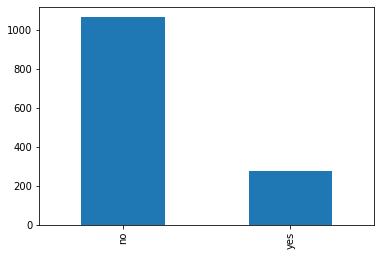

In [8]:
df['smoker'].value_counts().plot.bar()

In [9]:
# Verificando os valores mínimos e máximos de idade
df['age'].min(), df['age'].max()

(18, 64)

In [10]:
# Criando categorias
# Por idade
def age_to_cat(age):
    if (age >= 18) & (age <= 35):
        return 'Adult'
    elif (age > 35) & (age <= 55):
        return 'Senior'
    else:
        return 'Elder'
    
df['age_cat'] = df['age'].apply(age_to_cat)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Adult
1,18,male,33.770,1,no,southeast,1725.55230,Adult
2,28,male,33.000,3,no,southeast,4449.46200,Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult


In [11]:
# Criando categorias
# Por peso
def bmi_to_weight(bmi):
    if (bmi < 18.5):
        return 'Underweight'
    elif (bmi >= 18.5) & (bmi < 25):
        return 'Normal Weight'
    elif (bmi >= 25) & (bmi < 30):
        return 'Overweight'
    else:
        return 'Obese'
    
df['weight'] = df['bmi'].apply(bmi_to_weight)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight
0,19,female,27.900,0,yes,southwest,16884.92400,Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight


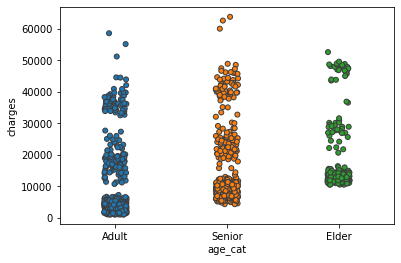

In [12]:
# Visualizando os dados
import seaborn as sns

# Relação Idade x Gastos
sns.stripplot(x="age_cat", y="charges", data=df, linewidth=1)

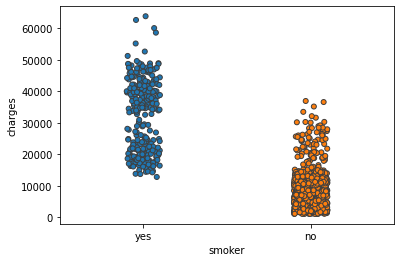

In [13]:
# Relação Fumo x Gastos
sns.stripplot(x="smoker", y="charges", data=df, linewidth=1)

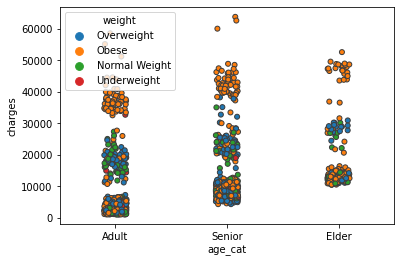

In [14]:
# Relação Idade x Gastos x Peso
sns.stripplot(x="age_cat", y="charges", hue='weight', data=df, linewidth=1)

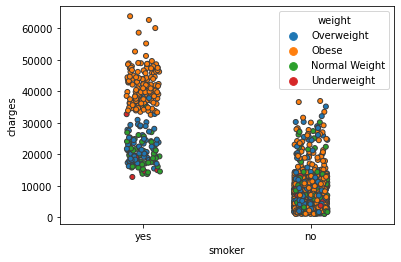

In [15]:
# Relação Fumo x Gastos x Peso
sns.stripplot(x="smoker", y="charges", hue='weight', data=df, linewidth=1)

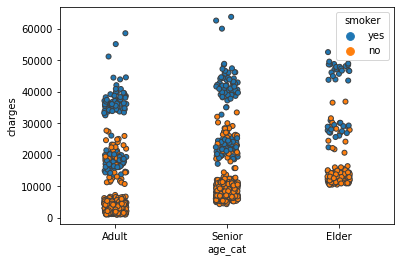

In [16]:
# Relação Idade x Gastos x Fumo
sns.stripplot(x="age_cat", y="charges", hue='smoker', data=df, linewidth=1)

In [17]:
# Clusterização
from sklearn.cluster import KMeans

# Antes de começar vamos selecionar as variáveis que iremos usar para criar os clusters
X = df[["bmi", "charges"]]

In [18]:
# Precisamos determinar a quantidade de clusters

# Método Elbow
# A ideia por trás do método é rodar a própria cluesterização k-means no dataset
# variando o valor de k (de 1 a 15 por exemplo), e para cada valor de k
# vamos calcular a soma quadrática dos erros (sum of squared errors - SSE)
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    sse.append(kmeans.inertia_)

In [19]:
# Verificando o resultado
sse

[196074271288.56747,
 48014969101.12295,
 22974312404.390133,
 12124777274.518303,
 8542144033.087301,
 6167188844.339402,
 4437050524.709174,
 3666778513.3384333,
 2786336867.899338,
 2253061092.2060986,
 1848851327.9263492,
 1501255548.8596277,
 1274297352.2289557,
 1086265167.4345884]

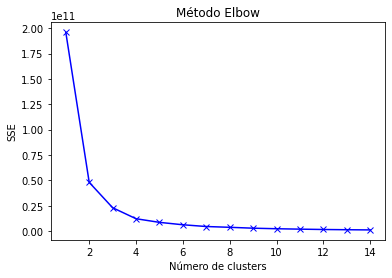

In [20]:
# Plotando o gráfico
import matplotlib.pyplot as plt

plt.plot(range(1, 15), sse, 'bx-')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

In [21]:
# Vamos executar a clusterização com 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_id = kmeans.fit_predict(X)

In [22]:
# Agora vamos guardar os resultados no dataframe
X['cluster_id'] = cluster_id

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bmi,charges,cluster_id
0,27.900,16884.92400,2
1,33.770,1725.55230,0
2,33.000,4449.46200,0
3,22.705,21984.47061,2
4,28.880,3866.85520,0


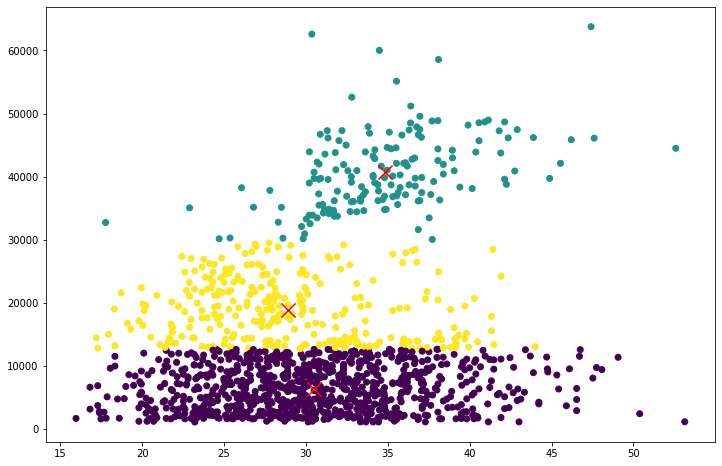

In [23]:
# Plotando os agrupamentos e os centroídes
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=200)
plt.show()

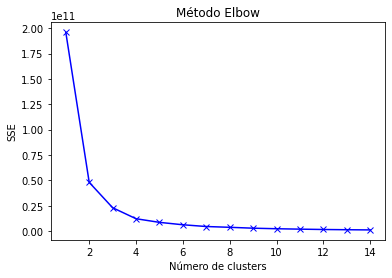

In [24]:
# Vamos clusterizar usando outras variáveis
X2 = df[["age", "charges"]]

# Método Elbow
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X2)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 15), sse, 'bx-')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


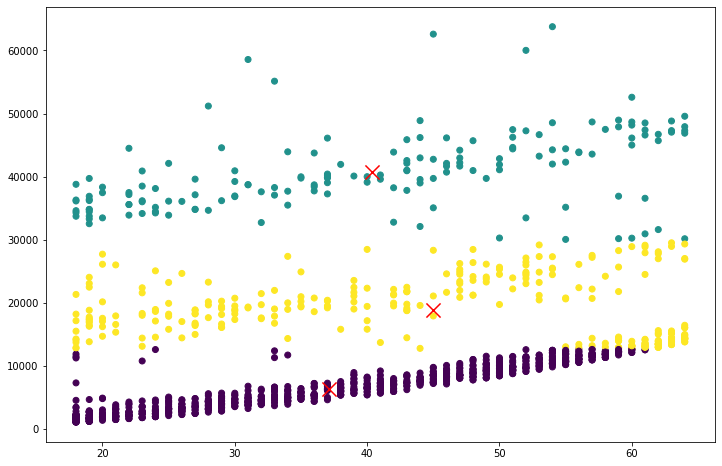

In [25]:
# Vamos executar a clusterização com 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_id = kmeans.fit_predict(X2)

# Agora vamos guardar os resultados no dataframe
X2['cluster_id'] = cluster_id

# Plotando os agrupamentos e os centroídes
fig = plt.figure(figsize=(12,8))

plt.scatter(X2.values[:,0], X2.values[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=200)
plt.show()

In [26]:
# Valores normalizados
df['log_charges'] = np.log(df['charges'])

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Adult,Overweight,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Adult,Obese,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obese,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal Weight,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Overweight,8.260197


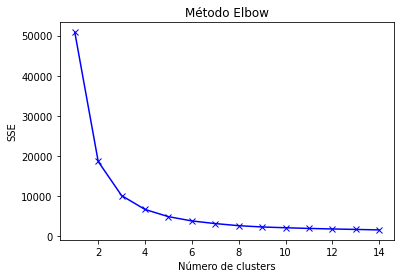

In [27]:
# Vamos clusterizar usando outras variáveis
X3 = df[["bmi", "log_charges"]]

# Método Elbow
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X3)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 15), sse, 'bx-')
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


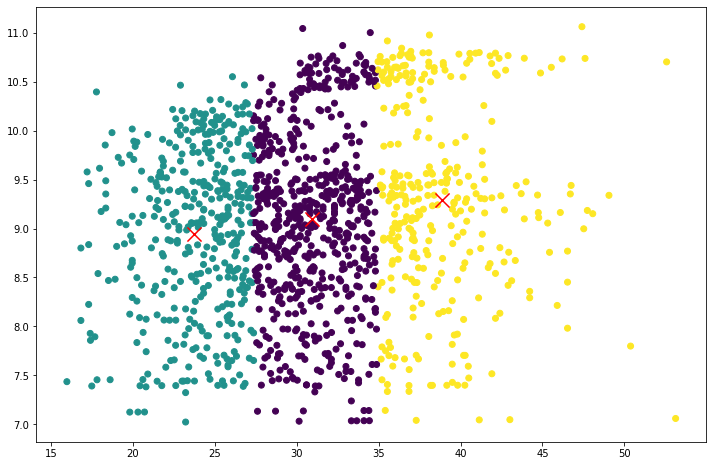

In [28]:
# Vamos executar a clusterização com 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_id = kmeans.fit_predict(X3)

# Agora vamos guardar os resultados no dataframe
X3['cluster_id'] = cluster_id

# Plotando os agrupamentos e os centroídes
fig = plt.figure(figsize=(12,8))

plt.scatter(X3.values[:,0], X3.values[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=200)
plt.show()